## **Predicting Heart Disease Using Machine Learning**

This notebook looks into using various Python-based machine learning and data science libraries. It is based on the [Heart Disease Classification](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) dataset.

We will take the following steps:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation



#### 1. Problem Definition:

Given clinical parameters about a patient, can we predict whether or not that patient has heart disease.

#### 2. Data

The original data came from the Cleveland data from the UCI Machine Learning Repository. There is also a version of it on Kaggle.
https://www.kaggle.com/code/robintomar11/heart-disease-prediction-by-deep-learning

#### 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

#### 4. Features

Each of the features in our data is listed below.

**Data Dictionary**

1. **Age:** Age in years                     
2. **Sex:** (male=1, female=0)
3. **cp:** Chest pain type:

    	0: Typical angina (chest pain),
        1: Atypical angina (chest pain not related to heart),
        2: Non-anginal pain (typically esophageal spasms (non heart related),
        3: Asymptomatic (chest pain not showing signs of disease)
4. **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital)                   
5. **chol:** Serum cholesterol in mg/dl
6. **fbs:** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)            
7. **restecg:** Resting electrocardiographic results:

    	0: Nothing to note,
        1: ST-T Wave abnormality,
        2: Left ventricular hypertrophy              
8. **thalach:** Maximum heart rate achieved                    
9. **exang:** Exercise induced angina (1 = yes; 0 = no)          
10. **oldpeak:** ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest            
11. **slope:** The slope of the peak exercise ST segment:

        0: Upsloping,
        1: Flatsloping,
        2: Downsloping               
12. **ca:** Number of major vessels (0-3) colored by fluoroscopy   
13. **thal:** Thallium stress result:

        1-3: Normal,
        6: Fixed defect,
        7: Reversible defect                  
14. **target:** Have disease or not (1 = yes; 0 = no)     

**Methodology:**

- **Exploratory Data Analysis (EDA):** EDA is conducted to understand the data distribution, relationships between features, and potential patterns related to heart disease. This involved visualizations like bar plots, scatter plots, and histograms.

- **Modeling:** Three machine learning models will evaluated: Logistic Regression, K-Nearest Neighbors (KNN), and Random Forest. Logistic Regression and Random Forest are selected for further tuning due to their performance.

- **Hyperparameter Tuning:** RandomizedSearchCV and GridSearchCV are employed to optimize the hyperparameters of Logistic Regression and Random Forest, leading to a slight performance boost.

- **Evaluation:** The tuned Logistic Regression model is evaluated using various metrics including accuracy, ROC curve, AUC score, confusion matrix, classification report, precision, recall, and F1-score. Cross-validation is utilized to ensure model robustness.

- **Feature Importance:** Feature importance analysis will be used to reveal the features contributing most significantly to the model's predictions.



##### *Preparing the tools*
We are going to use Pandas, Numpy, Matplotlib for data analysis and manipulation

In [ ]:
import numpy as np

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Print versions of libraries we're using (as long as yours are equal or greater than these, your code should work)
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2024-10-04 14:15:43.358983

NumPy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.7.1
Scikit-Learn version: 1.5.2


In [ ]:
df=pd.read_csv(r'/content/heart-disease.csv')

In [ ]:
df.shape # (rows, columns)

(303, 14)

### EDA-Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


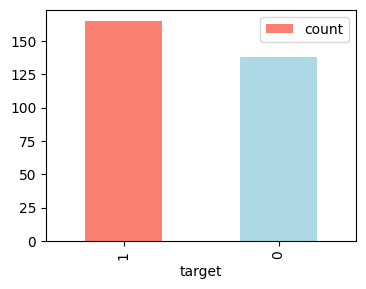

In [ ]:
# Check if the data is a balanced dataset. Target (heart_disease=1, no_heart_disease=0)
df.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue'], figsize=(4,3))
#plt.legend()
plt.show()

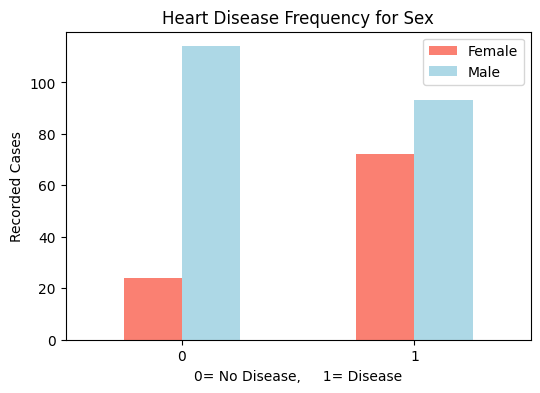

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['salmon','lightblue'] , figsize=(6,4))
plt.title("Heart Disease Frequency for Sex")
plt.ylabel('Recorded Cases')
plt.xlabel('0= No Disease,     1= Disease')
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

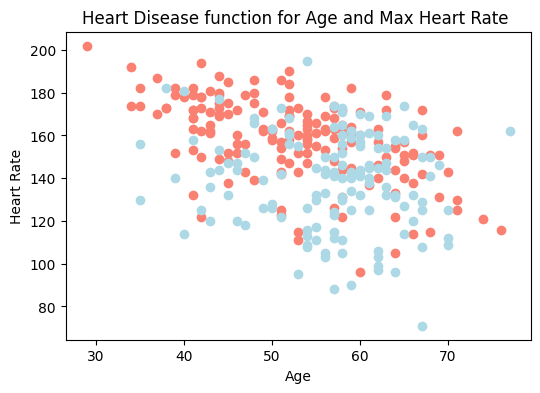

In [ ]:
## Age vs Max Heart Rate for Heart Disease

plt.figure(figsize=(6,4))

# Scatter plot with positive cases
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color='salmon')

# Scatter negative cases
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color='lightblue')
plt.title("Heart Disease function for Age and Max Heart Rate ")
plt.ylabel('Heart Rate')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.show()

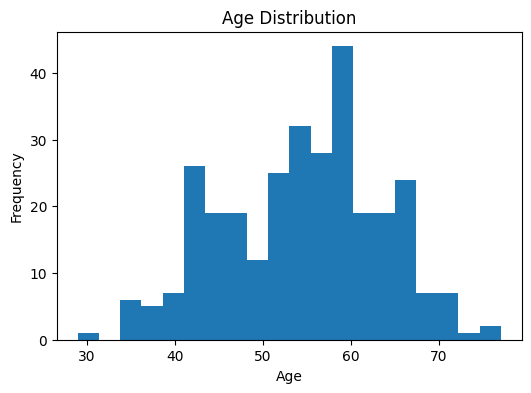

In [ ]:
df.age.plot.hist(bins=20, figsize=(6,4))
plt.title("Age Distribution")
plt.xlabel('Age')
plt.show()

### *Heart Disease Frequency per Chest Pain Type*
**cp:** Chest pain type:

    0: Typical angina (chest pain),
    1: Atypical angina (chest pain not related to heart),
    2: Non-anginal pain (typically esophageal spasms (non heart related),
    3: Asymptomatic (chest pain not showing signs of disease)

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


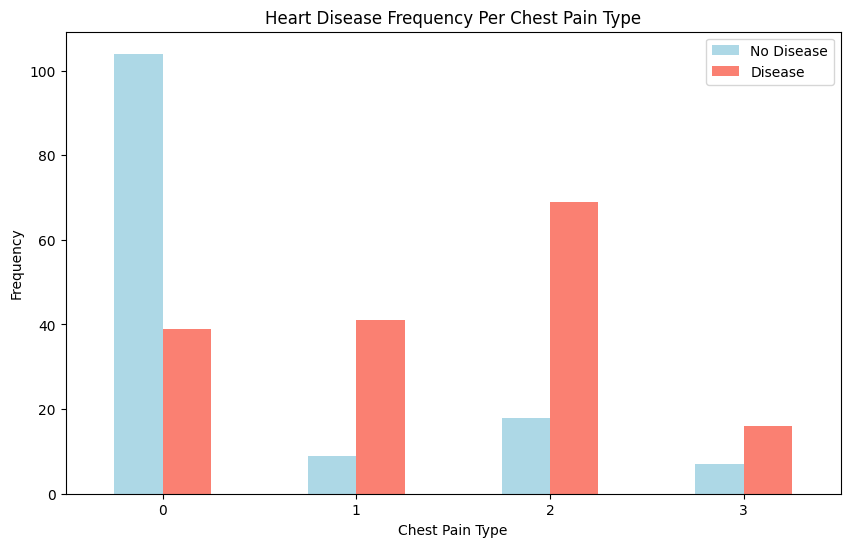

In [ ]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#### **Correlation Matrix**

In [ ]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


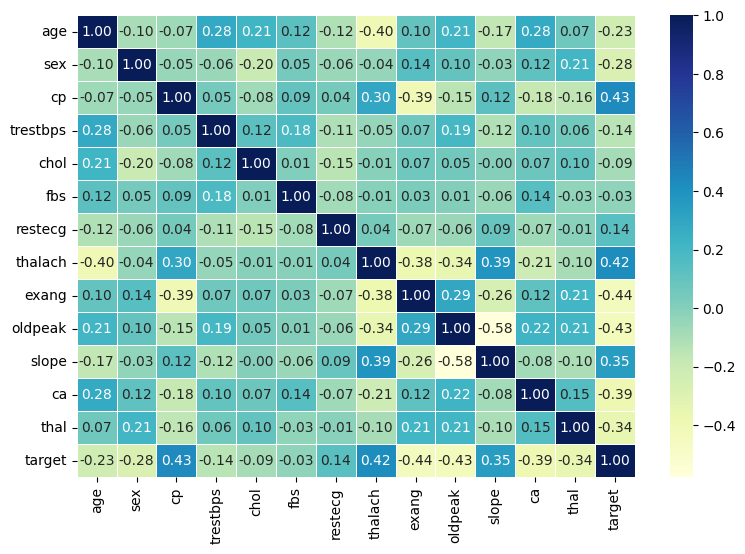

In [ ]:
corr_matrix =df.corr()
fig, ax =plt.subplots(figsize=(9,6))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')

## 5. Modelling

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Split data in to features and labels

X= df.drop('target', axis=1)

y= df.target

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
# Split data into train and test dataset

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [ ]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

We will build a machine learning model and train it on the training set. We are compare 3 different machine learning models:

1. Logistic Regression - sklearn.linear_model.LogisticRegression()

2. K-Nearest Neighbors - sklearn.neighbors.KNeighborsClassifier()

3. RandomForest - sklearn.ensemble.RandomForestClassifier()

In [ ]:
# Create a model dictionary
models = {'Logistic Regression':LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest' : RandomForestClassifier() }
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train,y_test):
    # set random seed
    np.random.seed(42)

    # Make dictionary to keeo model scores
    model_scores={}
     # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores


In [ ]:
model_scores=fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.8360655737704918}

In [ ]:
model_results= pd.DataFrame(list(model_scores.items()), columns=['Models', 'Model Scores'])
model_results

,Models,Model Scores
0,Logistic Regression,0.836066
1,KNN,0.606557
2,Random Forest,0.836066


<Axes: >

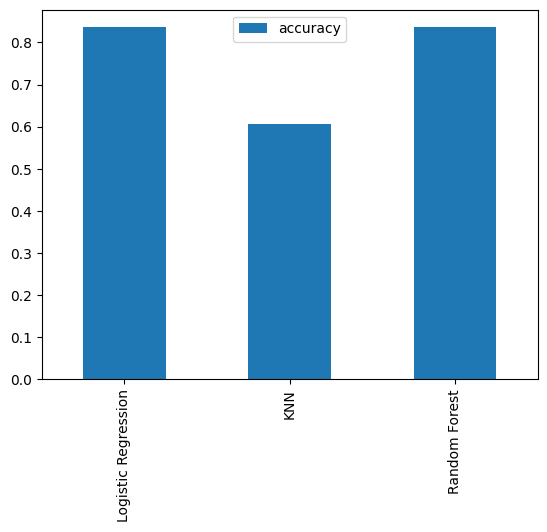

In [ ]:
model_compare=pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

We will look at following items.

* Hyperparameter tunning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area Under the curve (AUC)

#### **6. Hyperparameter Tunning**

In [ ]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors= range(1,21)

knn=KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.8305785123966942,
 0.8140495867768595,
 0.7851239669421488,
 0.7933884297520661,
 0.7768595041322314,
 0.7603305785123967,
 0.7603305785123967,
 0.7272727272727273,
 0.743801652892562,
 0.7355371900826446,
 0.71900826446281,
 0.7479338842975206,
 0.7066115702479339,
 0.7148760330578512,
 0.6942148760330579,
 0.7148760330578512,
 0.7024793388429752,
 0.7148760330578512,
 0.7024793388429752]

In [ ]:
test_scores

[0.4918032786885246,
 0.5081967213114754,
 0.5573770491803278,
 0.6229508196721312,
 0.6065573770491803,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.5901639344262295,
 0.6065573770491803,
 0.5737704918032787,
 0.6721311475409836,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.5901639344262295,
 0.6721311475409836,
 0.6065573770491803,
 0.6557377049180327]

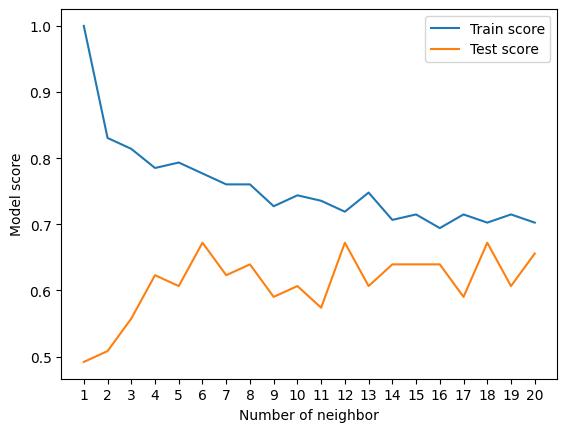

Maximum KNN score on the test data: 67.21%


In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbor")
plt.ylabel('Model score')
plt.legend()
plt.show()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

**NOTE:** Based on the hyperparameter tunning, KNN model will be eliminated.

### **Hyperparameter tunning with RandomizedSearchCV**

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

...by using RandomizedSearchCV

In [ ]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid={'C': np.logspace(-4,4,20),
              'solver': ['liblinear']}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we have our hyperparameter grids. let's use RandomizedSearchCV.

In [ ]:
%%time

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 566 ms, sys: 0 ns, total: 566 ms
Wall time: 586 ms


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [ ]:
rs_log_reg.score(X_test,y_test)

0.8032786885245902

Now we've tuned LogisticRegression using RandomizedSearchCV, we'll do the same for RandomForestClassifier.

In [ ]:
%%time

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 1min 20s, sys: 448 ms, total: 1min 20s
Wall time: 1min 21s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [ ]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.819672131147541

Tuning the hyperparameters for each model saw a slight performance boost in both the RandomForestClassifier and LogisticRegression.

## **HyperParamater Tunning with GridSearchCV**

The difference between RandomizedSearchCV and GridSearchCV is:

* sklearn.model_selection.RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations (e.g. will explore random combinations of the hyperparameters for a defined number of iterations).
* sklearn.model_selection.GridSearchCV will test every single possible combination of hyperparameters in the grid (this is a thorough test but can take quite a long time).

Each class will save the best model at the end of testing.

In [ ]:
%%time

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 557 ms, sys: 3.99 ms, total: 561 ms
Wall time: 568 ms


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8032786885245902

### 7. Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-Score

... and it would be great if cross validation used where possible.
In order to make comparision, first we need to make predictions.


In [ ]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
y_test

,target
231,0
301,0
104,1
292,0
159,1
...,...
233,0
8,1
184,0
296,0


#### ***Plot ROC Curve and calculaate AUC metric***

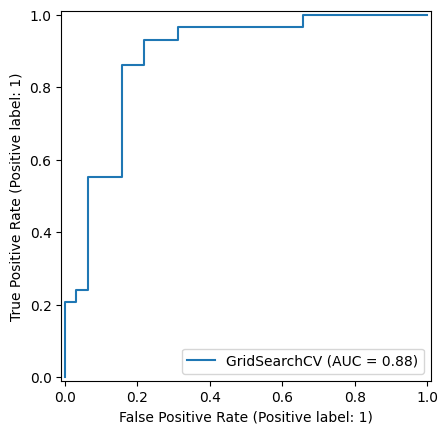

In [ ]:
# Plot ROC Curve and calculaate AUC metric
# Import the necessary modules
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot ROC Curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

#### ***Confusion Matrix***

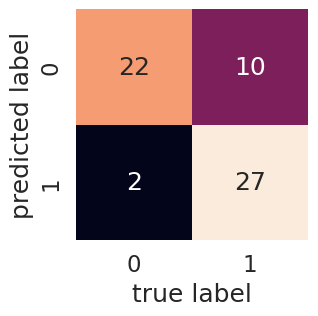

In [ ]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

#### ***Classification Report***

Classification report as well as cross-validated precision, recall and f1-score will be calculated.

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.73      0.93      0.82        29

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



#### **Calculate evaluation metrics using cross-validation**

We are going to calculate precision, recall and f1-score of our model model usiing cross-validation and to do we'll be using cross_val_score().

In [ ]:
# Check best hyperparameter
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
# new classifier with best hyperparameters
clf = LogisticRegression(C=0.615848211066026,
                         solver='liblinear')

In [ ]:
%%time

# Cross-validated accuracy score
cv_acc = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy")) # accuracy as scoring
cv_acc

CPU times: user 53.6 ms, sys: 6 µs, total: 53.6 ms
Wall time: 64.7 ms


0.8249180327868852

In [ ]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8122549019607843

In [ ]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.890909090909091

In [ ]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8481221874318333

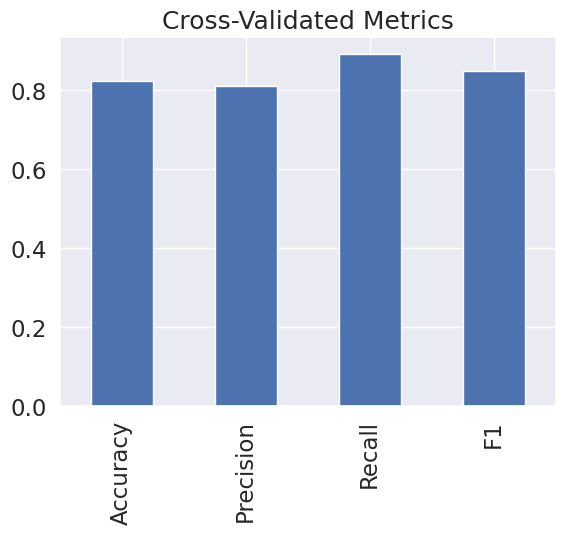

In [ ]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### **Feature Importance**

Let's check **"which features contributed most to the outcome of the model and how did they contribute?"**

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Fit an instance of LogistiRegression()

clf = LogisticRegression(C=0.615848211066026,
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [ ]:
# Check coef_
clf.coef_

array([[ 0.01458021, -1.36142692,  0.63509602, -0.01825903, -0.00349824,
        -0.04415033,  0.45924785,  0.0343129 , -0.67747723, -0.63387976,
         0.36366682, -0.66673259, -0.77044723]])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Match coef's of features to columns
feature_dict =dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.014580205170946502,
 'sex': -1.3614269179330083,
 'cp': 0.6350960210568767,
 'trestbps': -0.018259029442407943,
 'chol': -0.0034982434612116477,
 'fbs': -0.04415032877280114,
 'restecg': 0.4592478510904119,
 'thalach': 0.03431290438575585,
 'exang': -0.6774772277843373,
 'oldpeak': -0.6338797586499235,
 'slope': 0.3636668198465084,
 'ca': -0.6667325912384499,
 'thal': -0.7704472311998617}

<Axes: title={'center': 'Feature Importance'}>

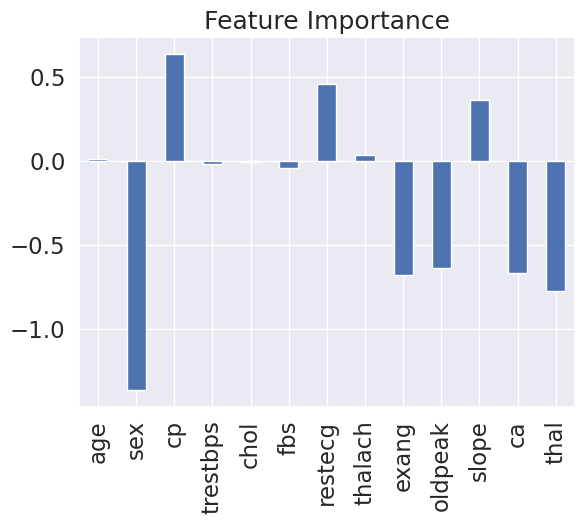

In [ ]:
# Visualize featire importance
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

In [ ]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# **Results:**

The tuned Logistic Regression model achieved an accuracy of approximately 88.5% and an AUC score of roughly 0.91 using cross-validation.

Feature importance analysis identified features like sex, chest pain type (cp), maximum heart rate achieved (thalach), and ST depression induced by exercise relative to rest (oldpeak) as being influential in predicting heart disease.

## **Conclusion:**

The project demonstrates the potential of machine learning in predicting heart disease using clinical data. While the target accuracy of 95% was not reached, the tuned Logistic Regression model showed promising results. Further investigation and potential model refinements might be necessary to achieve the desired accuracy level.

## **Key Insights:**

- **Sex:** There is a noticeable difference in heart disease prevalence between males and females.

- **Chest Pain Type:** Chest pain characteristics are indicative of heart disease risk.

- **Maximum Heart Rate:** Heart rate during exercise plays a role in heart disease prediction.
- **ST Depression:** The level of ST depression is a significant factor in identifying potential heart issues.


# **Next Steps:**

Consider exploring other machine learning algorithms or ensemble methods for potential performance improvement.
Further analyze feature interactions and explore feature engineering techniques to extract more relevant information from the data.
Collect more data to potentially improve the model's generalization ability.
Focus on strategies to address the remaining accuracy gap and meet the project goal of 95% accuracy.